In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/My Drive/data_set/train'
validation_dir = '/content/drive/My Drive/data_set/validation'
test_dir = '/content/drive/My Drive/data_set/test'

In [4]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary',
    subset='training'
)


Found 50 images belonging to 2 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 3 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=int(np.ceil(train_generator.samples / train_generator.batch_size)),
    validation_data=validation_generator,
    validation_steps=int(np.ceil(validation_generator.samples / validation_generator.batch_size)),
    epochs=10
)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6982 - accuracy: 0.5200 - val_loss: 0.8953 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6505 - accuracy: 0.5000 - val_loss: 0.6837 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.5804 - accuracy: 0.8400 - val_loss: 0.6921 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.4883 - accuracy: 0.8200 - val_loss: 0.7845 - val_accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.3553 - accuracy: 0.8800 - val_loss: 0.8638 - val_accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.2750 - accuracy: 0.8800 - val_loss: 0.7688 - val_accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.2505 - accuracy: 0.8200 - val_loss: 0.7201 - val_accuracy: 0.3333
Epoch 8/10
1/1 [=========================

In [10]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 385ms/step - loss: 0.5814 - accuracy: 1.0000
Validation Accuracy: 100.00%


In [11]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 9 images belonging to 1 classes.


In [12]:
predictions = model.predict(test_generator)

9/9 [==============================] - 3s 345ms/step


In [13]:
predictions = (predictions > 0.5).astype(int)

In [14]:
filenames = test_generator.filenames

In [15]:
for i in range(len(filenames)):
    print(f"File: {filenames[i]}, Prediction: {'Unnecessary' if predictions[i] == 1 else 'Necessary'}")

File: light_on/WhatsApp Image 2024-05-30 at 09.33.09.jpeg, Prediction: Unnecessary
File: light_on/WhatsApp Image 2024-05-30 at 09.33.18.jpeg, Prediction: Unnecessary
File: light_on/WhatsApp Image 2024-05-30 at 09.33.19 (1).jpeg, Prediction: Unnecessary
File: light_on/WhatsApp Image 2024-05-30 at 09.33.19.jpeg, Prediction: Unnecessary
File: light_on/WhatsApp Image 2024-05-30 at 09.33.20 (1).jpeg, Prediction: Unnecessary
File: light_on/WhatsApp Image 2024-05-30 at 09.33.20.jpeg, Prediction: Unnecessary
File: light_on/WhatsApp Image 2024-05-30 at 09.33.21 (1).jpeg, Prediction: Unnecessary
File: light_on/WhatsApp Image 2024-05-30 at 09.33.21 (2).jpeg, Prediction: Unnecessary
File: light_on/WhatsApp Image 2024-05-30 at 09.33.21.jpeg, Prediction: Unnecessary


In [16]:
image_path = "/content/drive/My Drive/data_set/test/light_on/WhatsApp Image 2024-05-30 at 09.33.09.jpeg"

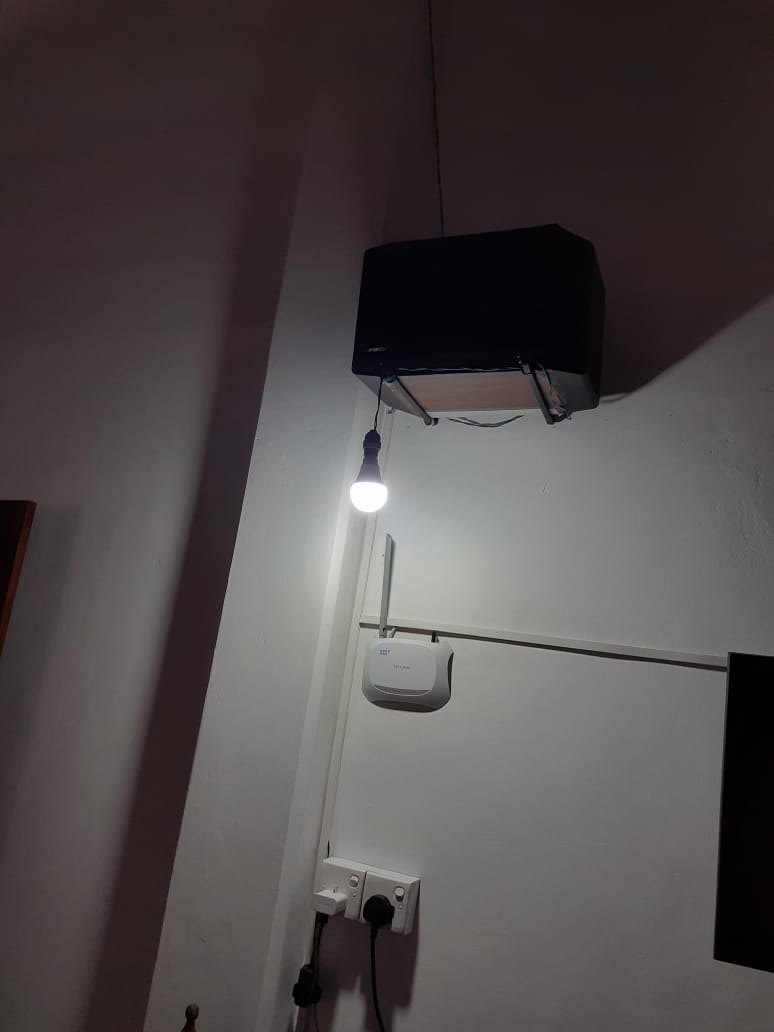

In [17]:
from IPython.display import Image, display
display(Image(filename=image_path))

In [18]:
from tensorflow.keras.preprocessing import image
img = image.load_img(image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale to match training data

In [19]:
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Prediction: Unnecessary")
else:
    print("Prediction: Necessary")

1/1 [==============================] - 0s 49ms/step
Prediction: Unnecessary
